<a href="https://colab.research.google.com/github/ElizabethA01/Machine_learning/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement learning**

The AI trains itself on how to play a game through trial and error to maximise the reward for the agent in an environment. 

Example = mario game

agent = the entity that is exploring the environment e.g. character in a game

environment = surrounding or level of the game

state = status of the agent e.g. location of the agent 
action = interaction between agent and environment e.g. jumping 

reward = a reward (either positive or negative) for every action

Q-learning = involves learning a matrix of action-reward values a.k.a Q-table or Q-matrix. It tells you the predicted reward for any state based on action taken.

Q learning chooses its next action by either:
randomly choosing

or based on Q table

Open AI gym project

In [1]:
import gym

In [2]:
env = gym.make('FrozenLake-v0') # going to use the Frozenlake environment

In [3]:
print(env.observation_space.n) # get number of states
print(env.action_space.n) # get number of actions

16
4


In [5]:
env.reset() # reset environment to default state

0

In [8]:
action = env.action_space.sample() # get a random action 
print(action)

2


In [9]:
observation, reward, done, info = env.step(action) # take action, notice it return information about the action

In [16]:
env.render() #  render the GUI for the environment

  (Right)
SFFF
FHFH
FFFH
HFFG


# **Frozen Lake Environment**



In [17]:
# building the Q-table

import gym
import numpy as np
import time
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [18]:
Q = np.zeros((STATES, ACTIONS)) # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
# define some constants

EPISODES = 10000 # how many time to run the environment from the beginning
MAX_STEPS = 100 # max no. of steps allowed for each run of environment

LEARNING_RATE = 0.81 # learning rate. the higher it is, the faster it runs
GAMMA = 0.96

In [25]:
# Picking an action

epsilon = 0.9 # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon: # check if a randomly selected value is less than epsilon
  action = env.action_space.sample()
else:
  action = np.argmax(Q,[state, ]) # use Q table to pick best action based on current values


In [ ]:
# updating Q values
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA + np.max(Q[new_state, ]) - Q [state, action])

In [33]:
RENDER = False 

rewards = []
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()
    if np.random.uniform(0,1) < epsilon:
      action = np.argmax(Q[state,])
    
    next_state, reward, done, _ = env.step(action)
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA + np.max(Q[new_state, ]) - Q [state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # reached goal

print(Q)
print(f'Average reward is: {sum(rewards)/len(rewards)}:')

#and now we can see our Q values!

NameError: ignored

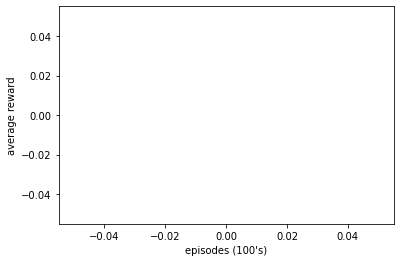

In [32]:
# we can plot the training progres and see how the agent improved

import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))


plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()